In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob

In [6]:

auth = tweepy.OAuthHandler( consumer_key , consumer_key_secret )
auth.set_access_token( access_token , access_token_secret )
api = tweepy.API(auth)

print(api)

In [7]:
df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])

# df['date'] = df['date'].apply(lambda a: pd.to_datetime(a).date())
# df['date'] = pd.to_datetime(df['date'])
# df.dtypes
# df['date'] = df['date'].dt.tz_localize(None)
print(df)

Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


In [8]:
def get_tweets(screen_name, count):
    i = 0
    
    # get all tweets and retweets from user timeline containing keyword "imran khan"
    for tweet in tweepy.Cursor(api.user_timeline, screen_name=screen_name, tweet_mode="extended", lang='en').items():
        if "imran khan" in tweet.full_text.lower() or "imrankhan" in tweet.full_text.lower():
            date = tweet.created_at
            df.loc[i, "Date"] = date.strftime("%Y-%m-%d")
            df.loc[i, "User"] = tweet.user.name
            df.loc[i, "IsVerified"] = tweet.user.verified
            df.loc[i, "Tweet"] = tweet.full_text
            df.loc[i, "Likes"] = tweet.favorite_count
            df.loc[i, "RT"] = tweet.retweet_count
            df.loc[i, "User_location"] = tweet.user.location
            
            df.to_excel('{}.xlsx'.format("TweetDataset_sama"), index=False)  # Save as Excel
            
            i += 1
            if i > count:
                break
    
    return df

screen_name = "SAMAATV"
count = 200

get_tweets(screen_name, count)


Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
Unexpected parameter: lang
U

,Date,User,IsVerified,Tweet,Likes,RT,User_location
0,2023-05-04,SAMAA TV,False,عمران خان کی غلط پالیسیوں کے باعث ملک کو نقصان...,12,6,Pakistan
1,2023-05-04,SAMAA TV,False,عمران خان سے تفتیش کا معاملہ،نمائندے کو شامل ت...,18,2,Pakistan
2,2023-05-04,SAMAA TV,False,عمران خان سے تفتیش کا معاملہ، زمان پارک کے باہ...,23,4,Pakistan
3,2023-05-04,SAMAA TV,False,زمان پارک واقعات عمران خان کو شامل تفتیش ہونے ...,9,3,Pakistan
4,2023-05-04,SAMAA TV,False,عمران خان کو بڑا ریلیف مل گیا، ضمانت منظور ہو...,19,3,Pakistan
...,...,...,...,...,...,...,...
143,2023-04-04,SAMAA TV,False,عمران خان پیشی کیلئےعدالت پہنچ گئے \n#SamaaTV ...,7,0,Pakistan
144,2023-04-04,SAMAA TV,False,مزیدتفصیلات جانیے\nhttps://t.co/SurmDC4cXw\n#I...,51,4,Pakistan
145,2023-04-04,SAMAA TV,False,مزیدتفصیلات جانیے\nhttps://t.co/CxYWMmhRQA\n#P...,21,1,Pakistan
146,2023-04-04,SAMAA TV,False,مزیدتفصیلات جانیے\nhttps://t.co/3b5s1Mt5sa\n#I...,67,7,Pakistan


In [9]:
# Showing the data the Data
df.head(10)     

,Date,User,IsVerified,Tweet,Likes,RT,User_location
0,2023-05-04,SAMAA TV,False,عمران خان کی غلط پالیسیوں کے باعث ملک کو نقصان...,12,6,Pakistan
1,2023-05-04,SAMAA TV,False,عمران خان سے تفتیش کا معاملہ،نمائندے کو شامل ت...,18,2,Pakistan
2,2023-05-04,SAMAA TV,False,عمران خان سے تفتیش کا معاملہ، زمان پارک کے باہ...,23,4,Pakistan
3,2023-05-04,SAMAA TV,False,زمان پارک واقعات عمران خان کو شامل تفتیش ہونے ...,9,3,Pakistan
4,2023-05-04,SAMAA TV,False,عمران خان کو بڑا ریلیف مل گیا، ضمانت منظور ہو...,19,3,Pakistan
5,2023-05-04,SAMAA TV,False,وفاقی وزیر اطلاعات مریم اورنگزیب کا عمران خان ...,14,3,Pakistan
6,2023-05-04,SAMAA TV,False,عمران خان ہر بار نیا شوشہ چھوڑ دیتا ہے ، احسن ...,13,1,Pakistan
7,2023-05-04,SAMAA TV,False,مزیدتفصیلات جانیے\nhttps://t.co/vnsn2zSfh9\n#a...,44,11,Pakistan
8,2023-05-04,SAMAA TV,False,اسلام آباد ہائی کورٹ کا عمران خان کیلئے بڑا حک...,7,3,Pakistan
9,2023-05-04,SAMAA TV,False,Imran Khan in trouble \n\n#imrakhan #breakingn...,12,3,Pakistan


In [10]:
import nltk
import string
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()



def clean_tweet(tweet):
    # tokenization
    tweet = word_tokenize(tweet)
    # lower case
    tweet = [word.lower() for word in tweet]
    tweet = [lemmatizer.lemmatize(word) for word in tweet]
    tweet = [word for word in tweet if word.isalpha()]
    tweet = " ".join(tweet)
    tweet = tweet.strip()
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # remove http links
    tweet = re.sub(r"http\S+", "", tweet)
    tweet = re.sub(r"@\S+", "", tweet)
    tweet = re.sub(r"[^\w\s]", "", tweet)
    tweet = re.sub(r"\d+", "", tweet)
    # remove https and username and special characters
    tweet = ' '.join(re.sub("(#[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())
    tweet = tweet.split()
    tweet = [word for word in tweet if word not in stopwords.words('english')]
    tweet = " ".join(tweet)
    tweet = PorterStemmer().stem(tweet)
    tweet = tweet.strip('https')
    tweet =tweet.split()
    tweet = [t for t in tweet if len(t) > 2]
    tweet = " ".join(tweet)
    
    
    return tweet

[nltk_data] Downloading package omw-1.4 to /home/bakar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [11]:
df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))

df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet
0,2023-05-04,SAMAA TV,False,عمران خان کی غلط پالیسیوں کے باعث ملک کو نقصان...,12,6,Pakistan,amaatv imrankhan sharjeelmemon
1,2023-05-04,SAMAA TV,False,عمران خان سے تفتیش کا معاملہ،نمائندے کو شامل ت...,18,2,Pakistan,amaatv pti imrankhan
2,2023-05-04,SAMAA TV,False,عمران خان سے تفتیش کا معاملہ، زمان پارک کے باہ...,23,4,Pakistan,amaatv pti imrankhan
3,2023-05-04,SAMAA TV,False,زمان پارک واقعات عمران خان کو شامل تفتیش ہونے ...,9,3,Pakistan,amaatv zamanpark pti imrankhancases samaaupdates
4,2023-05-04,SAMAA TV,False,عمران خان کو بڑا ریلیف مل گیا، ضمانت منظور ہو...,19,3,Pakistan,amaatv imrankhan imrankhanbail samaaupdates


In [12]:
from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    # print analysis values
    if analysis.sentiment.polarity >=0 and analysis.sentiment.polarity <=0.3:
        some_positive = "some positive"
        return some_positive
    elif analysis.sentiment.polarity >=0.3 and analysis.sentiment.polarity <=0.6:
        positive = "positive"
        return positive
    elif analysis.sentiment.polarity >=0.6 and analysis.sentiment.polarity <=1:
        very_positive = "very positive"
        return very_positive
    elif analysis.sentiment.polarity >=-0.3 and analysis.sentiment.polarity <=0:
        some_negative = "some negative"
        return some_negative    
    elif analysis.sentiment.polarity >=-0.6 and analysis.sentiment.polarity <=-0.3:
        negative = "negative"
        return negative
    elif analysis.sentiment.polarity >=-1 and analysis.sentiment.polarity <=-0.6:
        very_negative = "very negative"
        return very_negative
    else:
        neutral = "neutral"
        return neutral

In [13]:
df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))
df.head(10)
# save df['sentiment'] to csv
df.to_excel('{}.xlsx'.format("Sentiment_sama"),index=False)   ## Save as Excel

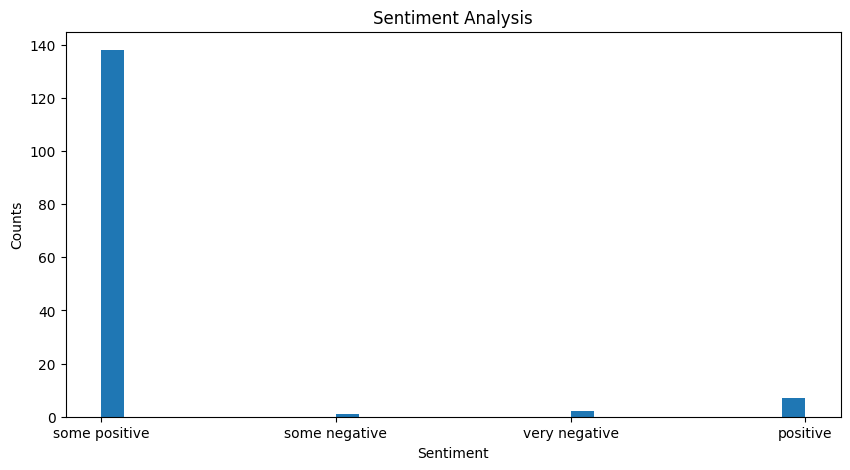

([<matplotlib.patches.Wedge at 0x7f709593e0e0>,
 [Text(-1.0753107487682443, 0.231747262299856, 'some positive'),
  Text(1.058383226663469, -0.29970810052019636, 'positive'),
  Text(1.0960372271061567, -0.09328663782904333, 'very negative'),
  Text(1.099752185252688, -0.023348041286961344, 'some negative')],
 [Text(-0.5865331356917695, 0.12640759761810327, '93.2%'),
  Text(0.5772999418164376, -0.1634771457382889, '4.7%'),
  Text(0.5978384875124491, -0.05088362063402362, '1.4%'),
  Text(0.5998648283196479, -0.012735295247433458, '0.7%')])

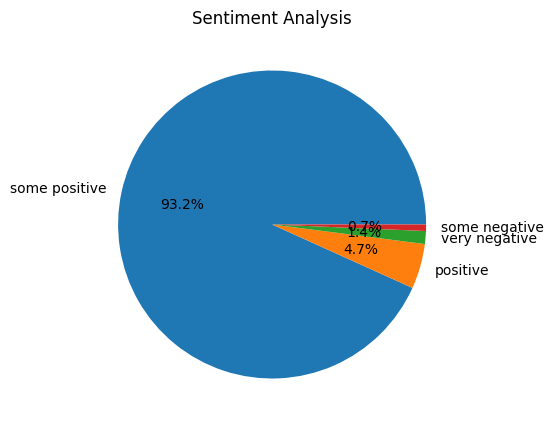

In [14]:
# print report of sentiment analysis
plt.figure(figsize=(10, 5))
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
# plot graph of sentiment analysis with matplotlib
plt.hist(df['Sentiment'], bins=30)
plt.show()
# print pie chart of sentiment analysis
plt.figure(figsize=(10, 5))
plt.title('Sentiment Analysis')
plt.pie(df['Sentiment'].value_counts(), labels=df['Sentiment'].value_counts().index, autopct='%1.1f%%')